# Tabla de Contenidos

1. [Introducción](#introducción)
2. [Descripción de los campos](#Descripción-de-los-campos)
3. [Análisis exploratorio](#Análisis-exploratorio)
4. [Análisis Univariado](#Análisis-Univariado)
5. [Análisis Bivariado/mutivariado](#Análisis-Bivariado/mutivariado)
6. [Limpieza de los datos](#Limpieza-de-los-datos)
7. [Tratamiento para conjunto de datos desbalanceado](Tratamiento-para-conjunto-de-datos-desbalanceado)
8. [Creación de un modelo de clasificación sin realizar balancedo de clases](#Creación-de-un-modelo-de-clasificación-sin-realizar-balancedo-de-clases)
9. [Metodo de Remuestreo (Submuestreo o Undersampling)](#Metodo-de-Remuestreo-(Submuestreo-o-Undersampling))
10. [Método de sobremuestreo (SMOTE)](#Método-de-sobremuestreo-(SMOTE))

## Introducción
## Descripción de los campos
## Análisis exploratorio
## Análisis Univariado
## Análisis Bivariado/mutivariado
## Limpieza de los datos
## Tratamiento para conjunto de datos desbalanceado
## Creación de un modelo de clasificación sin realizar balancedo de clases
## Metodo de Remuestreo (Submuestreo o Undersampling)
## Método de sobremuestreo (SMOTE)

# **INTRODUCCION**

En el sector salud, las glosas representan un desafío crítico, no solo desde una perspectiva financiera, sino también en cuanto a la calidad del servicio prestado. Las estancias no pertinentes en la Unidad de Cuidados Intensivos (UCI) impactan directamente en la eficiencia del sistema, generando costos innecesarios y ocupando recursos que representan perdidas importantes para la Institución. Nuestro objetivo es lograr una reducción del 3% en estas glosas, mejorando tanto la eficiencia operativa como la calidad asistencial.

Para abordar este reto, proponemos el uso de ciencia de datos e inteligencia artificial, aprovechando los datos históricos de pacientes para identificar patrones de estancias no pertinentes. A través de modelos predictivos, segmentación de pacientes y la implementación de un sistema de monitoreo en tiempo real, buscamos prevenir inconsistencias y optimizar la toma de decisiones. Este enfoque no solo permitirá reducir las glosas, sino también promover una gestión más efectiva de los recursos en la UCI, beneficiando tanto a la institución como a los pacientes.

El horizonte temporal de este proyecto es de seis meses, tiempo en el cual mediremos el impacto y ajustaremos las estrategias para garantizar el éxito en la reducción de glosas.

## **PREGUNTA SMART**

¿Cómo reducir en un 3% las glosas por estancia no pertinente en la UCI de la clínica, 
usando los datos históricos de pacientes para mejorar la eficiencia y calidad del servicio, en un período de seis meses?

**Problema específico:** Glosas por estancia no pertinente en la UCI.

**Medición:** Reducción del 3% en las glosas.

**Alcanzable:** Usar modelos predictivos con recursos actuales.

**Objetivos relevantes:** Mejorar eficiencia y calidad del servicio.

**Plazo de tiempo:** Seis meses.



In [231]:
# Importación de las librerías necesarias

import math  # Librería matemática básica
import seaborn as sns  # Librería para visualización estadística avanzada
import pandas as pd  # Manejo de datos en forma de tablas (DataFrames)
import numpy as np  # Operaciones con arreglos y cálculos numéricos eficientes

import matplotlib.pyplot as plt  # Biblioteca básica para visualización de datos

from sklearn.model_selection import train_test_split  # División de los datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler  # Estandarización de las características (media 0, varianza 1)
from sklearn.linear_model import LinearRegression  # Modelo de regresión lineal
from sklearn.cluster import KMeans  # Algoritmo de clustering no supervisado
from sklearn.decomposition import PCA  # Análisis de Componentes Principales para reducción de dimensionalidad
from sklearn.metrics import mean_squared_error  # Métrica de error cuadrático medio
from sklearn.base import BaseEstimator, TransformerMixin # Clases base para la creación de transformadores personalizados
from sklearn.preprocessing import LabelEncoder  # Codificar variables categóricas
from sklearn.ensemble import IsolationForest # Algoritmo de detección de anomalías
from sklearn import preprocessing # Normalización de los datos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Métricas de evaluación de modelos
from sklearn.model_selection import cross_val_score # Validación cruzada
from sklearn.model_selection import GridSearchCV # Búsqueda de hiperparámetros
from sklearn.ensemble import RandomForestClassifier # Modelo de clasificación Random Forest
from sklearn.linear_model import LogisticRegression # Modelo de clasificación Regresión Logística
from sklearn.preprocessing import MinMaxScaler # Normalización de los datos

import warnings  # Importa el módulo de advertencias de Python
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

In [122]:
# Se carga el dataset
df = pd.read_excel('uci.xlsx', sheet_name='FUENTE MODIFICADA')

# Descripción de los campos

**Sigla unorg.enfermería:** código de la unidad organizacional de enfermería.

**Fecha de admisión:** fecha en la que el paciente fue admitido.

**Nº documento:** número de identificación del paciente.

**Episodio:** número o identificador del episodio de atención.

**Nombre:** nombre y apellido del paciente 

**Edad:** edad del paciente.

**Sexo:** género del paciente.

**Cama:** número de la cama asignada al paciente.

**Habit:** número de la habitación donde está el paciente.

**Aseguradora:** entidad aseguradora del paciente.

**Categ.tratamiento:** categoría requerida (UCI, UCIN).

**Fecha ingreso uci:** fecha de ingreso del paciente a la uci.

**Fecha de seguimiento:** fecha de seguimiento del caso en la uci.

**Días estancia en uci:** días que permaneció el paciente en la unidad

**Criterio general:** criterio general utilizado para evaluar la estancia.

**Criterio especifico:** criterio específico para evaluar la estancia.

**Diagnóstico:** diagnóstico médico del paciente.

**Cumple categ.tratamiento para:** indica que el tratamiento cumple la categoría requerida.

**Cumple criterio aislamiento uci:** cumplimiento de criterios de aislamiento en la uci.

**Observaciones auditoria medica fcvl:** observaciones de la auditoría médica.

**Medico auditor responsable:** nombre del médico auditor responsable.

**Observaciones coordinador md-adm uci:** comentarios del coordinador de la uci.

**Fecha de respuesta coordinador md adm ucil:** fecha de respuesta del coordinador de la uci.

**Seguimiento (a cargo auditoria fvl):** seguimiento a cargo de la auditoría.

**Impacto valorizado:** valor del impacto económico estimado.

**Médico tratante:** nombre del médico tratante del paciente.

**Auditoria de acuerdo con criterio:** indica si la auditoría sigue los criterios establecidos.

**Cambio efectivo:** indica si hubo un cambio efectivo en la categoría de tratamiento.

**Glosa efectiva notas crédito:** registro de glosa.

**Factura notas crédito:** información de facturas con notas crédito.

**Mes revisión:** mes en que se realizó la revisión.

**Glosa efectiva preglosa:** glosa efectiva antes de la glosa oficial.

**Fecha glosada:** día que fue glosado por la entidad.


# Análisis exploratorio 

Empezaremos por revisar la estructura del dataset, la consistencia entre los datos y que tengan el formato adecuado.

# Análisis de estructura 

In [123]:
# revisar la cantidad de datos del dataset original
df.shape

(1916, 44)

In [124]:
# Mostrar las primeras 5 filas del dataset utilizando el método dataframe.head()
df.head()

,Sigla UnOrg.enfermería,Fecha de admisión,Nº documento,Episodio,Apellido 1,Apellido 2,Primer Nombre,Segundo Nombre,Edad,Sexo,...,GLOSA PROBABLE EVITADA,NÚMERO DE RX SIN COMENTAR,COMENTARIO AUDITORIA,CAMBIO CATEGORIA DESDE COORDINACIÓN,CAMBIO FACTURACIÓN,GLOSA EFECTIVA NOTAS CRÉDITO,FACTURA NOTAS CRÉDITO,MES REVISIÓN,GLOSA EFECTIVA PREGLOSA,FECHA GLOSADA
0,T4P7 UCI,2024-03-14,48570565,11781030,FAJARDO,VICTORIA,ADELINDA,,68,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
1,T4P7 UCI,2024-03-02,31957509,11736934,LOZANO,RESTREPO,SOLANGEN,,60,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
2,T4P7 UCI,2024-02-19,14947836,11689275,SANDOVAL,REINEL,LUIS,ANGEL,77,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
3,T3P2 UCI AdA,2024-03-09,31219066,11764746,CHALA,,DIONISIA,,74,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
4,T3P2 UCI AdA,2024-03-03,31866944,11735955,CRUZ,BRICEÑO,MILENA,,62,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN


In [125]:
# Comprobar el tipo de datos
df.dtypes

Sigla UnOrg.enfermería                                object
Fecha de admisión                             datetime64[ns]
Nº documento                                           int64
Episodio                                               int64
Apellido 1                                            object
Apellido 2                                            object
Primer Nombre                                         object
Segundo Nombre                                        object
Edad                                                   int64
Sexo                                                  object
Cama                                                  object
Habit.                                                object
Aseguradora                                           object
Categ.tratamiento                                     object
Fecha Ingreso Uci                                     object
Fecha de seguimiento                          datetime64[ns]
Dias  Estancia en  UCI  

In [126]:
# Análisis de valores nulos
print(df.isnull().sum())
print('\n')

Sigla UnOrg.enfermería                           0
Fecha de admisión                                0
Nº documento                                     0
Episodio                                         0
Apellido 1                                       0
Apellido 2                                     271
Primer Nombre                                    0
Segundo Nombre                                 703
Edad                                             0
Sexo                                             0
Cama                                             0
Habit.                                           0
Aseguradora                                      0
Categ.tratamiento                                0
Fecha Ingreso Uci                                2
Fecha de seguimiento                             0
Dias  Estancia en  UCI                           0
Criterio general                                 0
Criterio especifico                             46
Diagnostico                    

Se cuenta con una cantidad de valores nulos grande pero contamos con muchas variables de las cuales no haremos uso.

In [127]:
# crear una columna para transformar la variable categorica a numerica para identificar cuales tuvieron glosa
df['Glosa'] = df['GLOSA EFECTIVA NOTAS CRÉDITO'].apply(lambda x: True if x >0 else False)

In [128]:
# Comprobar el tipo de datos resultantes
df.dtypes

Sigla UnOrg.enfermería                                object
Fecha de admisión                             datetime64[ns]
Nº documento                                           int64
Episodio                                               int64
Apellido 1                                            object
Apellido 2                                            object
Primer Nombre                                         object
Segundo Nombre                                        object
Edad                                                   int64
Sexo                                                  object
Cama                                                  object
Habit.                                                object
Aseguradora                                           object
Categ.tratamiento                                     object
Fecha Ingreso Uci                                     object
Fecha de seguimiento                          datetime64[ns]
Dias  Estancia en  UCI  

Las columnas corresponden a la descripción de los atributos del dataset mencionado anteriormente. De estas columnas la última columna (Glosa) es la variable objetivo.

Vamos a ver cómo se encuentra distribuida esta variable:

In [129]:
# Cuenta los valores de la columna 'Glosa', y calcula la proporción de cada uno.
(df.value_counts('Glosa',normalize=True)*100).round(2).astype(str)+'%'

Glosa
False    97.49%
True      2.51%
Name: proportion, dtype: object

Se puede observar que el 97.49% de las entradas en la columna 'Glosa' no fueron glosadas (valor False) hasta el momento, mientras que el 2.51% sí fueron glosadas.

Para un mejor entendimiento se va a observar graficamente:

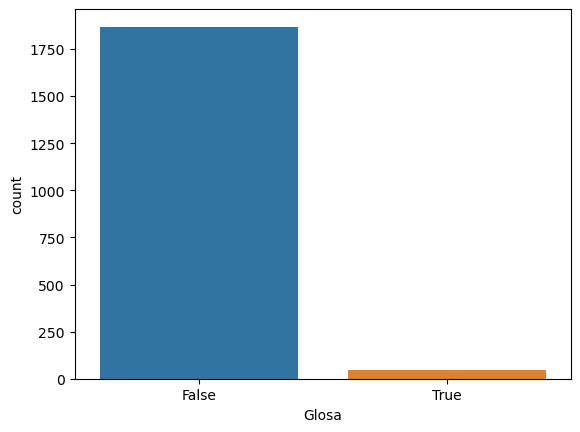

<Figure size 500x300 with 0 Axes>

In [130]:
# Graficar la distribución de la variable 'Glosa'
percentaje = df['Glosa'].value_counts(normalize=True) * 100
percentaje = percentaje.round(2).astype(str) + '%'
sns.countplot(data=df, x='Glosa')
plt.figure(figsize=(5, 3))
plt.show()

Identificamos que el dataset se encuentra desbalanceado

# Análisis Univariado

Aqui se muestra los nombres de las columnas del DataFrame junto con los tipos de datos asignados a cada una. Este análisis es útil para entender la estructura del DataFrame y asegurarse de que los datos estén correctamente tipificados antes de proceder con cualquier tipo de análisis o manipulación.

Según la descripción de los campos, las siguientes variables son categóricas:
Sexo, Aseguradora, Categ.tratamiento, Criterio general, Criterio específico y la variable objetivo Glosa. 

las siguientes variables son numericas: Edad, Dias  Estancia en  UCI

Eliminamos las filas que no nos aportan informacion relevante, ya que no nos van a servir ni para entrenar ni para validar

count    1916.000000
mean       56.812109
std        18.760443
min        18.000000
25%        43.000000
50%        59.000000
75%        71.000000
max        97.000000
Name: Edad, dtype: float64


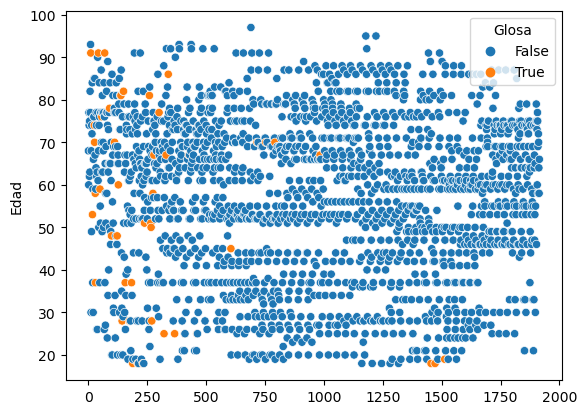

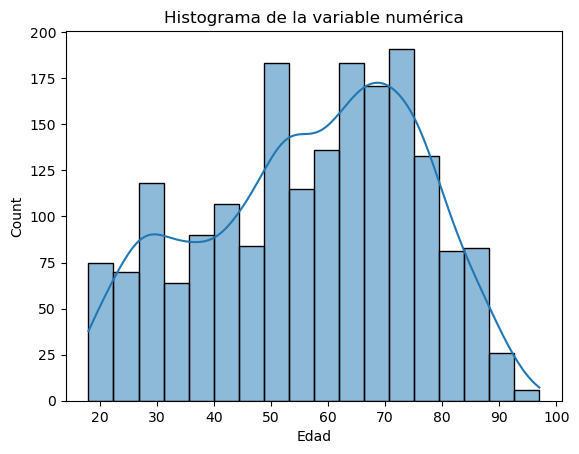

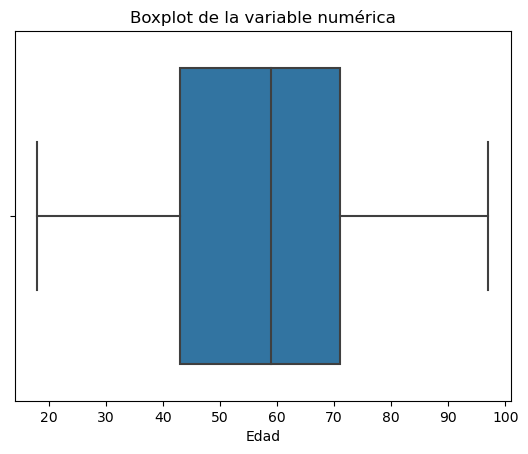

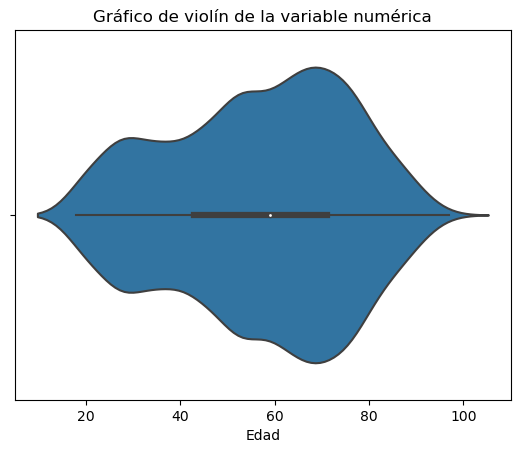

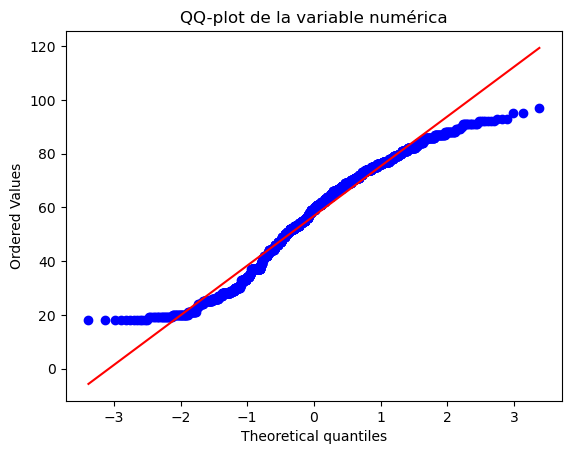

Asimetría: -0.2864351798112924
Kurtosis: -0.8604478237877013
Outliers: Empty DataFrame
Columns: [Sigla UnOrg.enfermería, Fecha de admisión, Nº documento, Episodio, Apellido 1, Apellido 2, Primer Nombre, Segundo Nombre, Edad, Sexo, Cama, Habit., Aseguradora, Categ.tratamiento, Fecha Ingreso Uci, Fecha de seguimiento, Dias  Estancia en  UCI, Criterio general, Criterio especifico, Diagnostico, Cumple Categ.tratamiento para:, Cumple criterio Aislamiento UCI, Observaciones Auditoria Medica FCVL, Medico Auditor responsable, Observaciones Coordinador Md-adm UCI, Fecha de respuesta Coordinador Md adm UCIL, Seguimiento ( a cargo auditoria FVL), Impacto valorizado , MÉDICO TRATANTE , AUDITORIA DE ACUERDO CON CRITERIO , CAMBIO EFECTIVO , RX TORAX , COMENTADA  HC , INTERVENCION AUDITORIA , GLOSA PROBABLE EVITADA , NÚMERO DE RX SIN COMENTAR , COMENTARIO AUDITORIA , CAMBIO CATEGORIA DESDE COORDINACIÓN, CAMBIO FACTURACIÓN , GLOSA EFECTIVA NOTAS CRÉDITO, FACTURA NOTAS CRÉDITO, MES REVISIÓN, GLOSA EFEC

In [131]:
#Analisis para una variable numerica

# 1. Estadísticos descriptivos básicos
print(df['Edad'].describe())

# 2. Visualización de la distribución
sns.scatterplot(x = df.index, y = df['Edad'],hue=df['Glosa'])
plt.show()

# 3. Visualización de la distribución
sns.histplot(df['Edad'], kde=True)
plt.title('Histograma de la variable numérica')
plt.show()

# 4. Boxplot para identificar outliers
sns.boxplot(x=df['Edad'])
plt.title('Boxplot de la variable numérica')
plt.show()

# 5. Gráfico de violín para una visualización más detallada
sns.violinplot(x=df['Edad'])
plt.title('Gráfico de violín de la variable numérica')
plt.show()

# 6. QQ-plot para evaluar la normalidad
from scipy import stats
stats.probplot(df['Edad'], plot=plt)
plt.title('QQ-plot de la variable numérica')
plt.show()

# 7. Medidas de asimetría y kurtosis
print('Asimetría:', df['Edad'].skew())
print('Kurtosis:', df['Edad'].kurt())

# 8. Identificación de outliers (por ejemplo, utilizando IQR)
Q1 = df['Edad'].quantile(0.25)
Q3 = df['Edad'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Edad'] < Q1 - 1.5*IQR) | (df['Edad'] > Q3 + 1.5*IQR)]
print('Outliers:', outliers)

La distribución de la variable Edad sugiere que la mayoría de los pacientes que ingresan a la UCI son de edad mediana o avanzada, con un rango de 18 a 97 años. La mediana y el percentil 75 indican que la mayoría de los pacientes son mayores de 50 años, aunque hay una dispersión significativa en la edad de los pacientes, como lo demuestra la desviación estándar. Los valores mínimo y máximo sugieren que tanto adultos jóvenes como muy mayores pueden requerir cuidados intensivos, lo que implica una población diversa en términos de edad dentro de la UCI.

Se evidencia una ligera asimetría negativa, sugiriendo que la distribución tiene una cola más larga a la izquierda. Existe una distribución menos concentrada en el centro y con colas más delgadas en comparación con una distribución normal. Adicionalmente No se identificaron valores atípicos en la variable Edad según el análisis de rango intercuartílico (IQR).

Criterio general
CARDIOVASCULAR      781
RESPIRATORIO        374
QUIRURGICO          261
NEUROLOGICO         251
MISCELÁNEAS         125
ENDOCRINO            67
GASTROINTESTINAL     21
RENAL                19
GRAN QUEMADOS        16
UCI-CHOQUE            1
Name: count, dtype: int64
Criterio general
CARDIOVASCULAR      0.407620
RESPIRATORIO        0.195198
QUIRURGICO          0.136221
NEUROLOGICO         0.131002
MISCELÁNEAS         0.065240
ENDOCRINO           0.034969
GASTROINTESTINAL    0.010960
RENAL               0.009916
GRAN QUEMADOS       0.008351
UCI-CHOQUE          0.000522
Name: count, dtype: float64


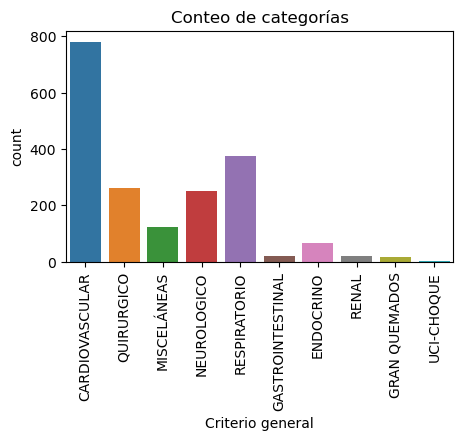

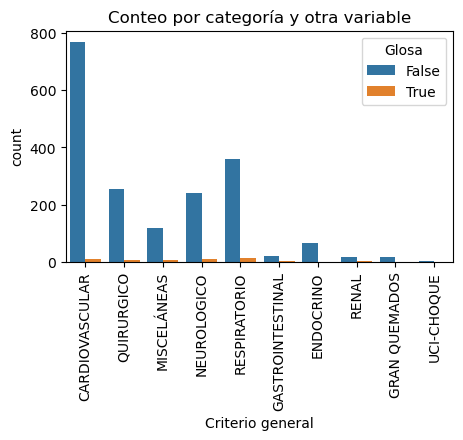

Glosa,False,True
Criterio general,,
CARDIOVASCULAR,770,11
ENDOCRINO,67,0
GASTROINTESTINAL,20,1
GRAN QUEMADOS,16,0
MISCELÁNEAS,119,6
NEUROLOGICO,241,10
QUIRURGICO,255,6
RENAL,18,1
RESPIRATORIO,361,13


In [132]:
#Análisis para una variable categórica

# 1. Frecuencias absolutas y relativas
freq = df['Criterio general'].value_counts()
print(freq)
print(freq / len(df))

# 3. Visualización de la distribución
plt.figure(figsize=(5, 3))
sns.countplot(x='Criterio general', data=df)
plt.title('Conteo de categorías')
plt.xticks(rotation=90)
plt.show()

# 4. Gráfico de barras apiladas (si tienes otra variable categórica)
plt.figure(figsize=(5, 3))
sns.countplot(x='Criterio general', hue='Glosa', data=df)
plt.title('Conteo por categoría y otra variable')
plt.xticks(rotation=90)
plt.show()

# 2. Tabla de frecuencias cruzadas (si tienes otra variable categórica)
pd.crosstab(df['Criterio general'], df['Glosa'])


**Conclusiones**

**CARDIOVASCULAR** es el principal motivo de ingreso, representando el 40.76% de los casos (781 pacientes). Este dominio puede estar relacionado con la prevalencia de enfermedades cardíacas y la necesidad de monitoreo intensivo.

**RESPIRATORIO** (19.52%) y **QUIRÚRGICO** (13.62%) son otros motivos comunes de ingreso, lo que sugiere una alta carga de patologías pulmonares y la recuperación postoperatoria como razones clave para el ingreso a la UCI.

**NEUROLÓGICO** (13.10%) también es significativo, reflejando que los pacientes con problemas del sistema nervioso central requieren atención intensiva.
Los otros criterios como **ENDOCRINO**, **GASTROINTESTINAL**, **RENAL**, y **GRAN QUEMADOS** tienen una representación menor, lo que indica que estos casos son menos comunes en esta UCI.

**Frecuencia de glosas (rechazos de pago):**

En general, la proporción de glosas es baja, con la mayoría de los criterios generales presentando menos del 2% de casos con glosas, indicando que en la mayoría de los casos, las estancias en UCI son consideradas pertinentes por los aseguradores.
El criterio CARDIOVASCULAR tiene 11 glosas sobre un total de 781 casos, lo que equivale a aproximadamente 1.4%, siendo una proporción baja dado el volumen de pacientes.
Los casos RESPIRATORIOS tienen un porcentaje de glosas similar (3.47%), con 13 glosas de 374 pacientes.
Los criterios como ENDOCRINO, GRAN QUEMADOS, y UCI-CHOQUE no presentaron ninguna glosa.

Sexo
M    995
F    921
Name: count, dtype: int64
Sexo
M    0.519311
F    0.480689
Name: count, dtype: float64


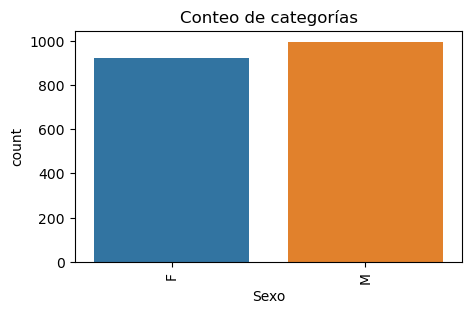

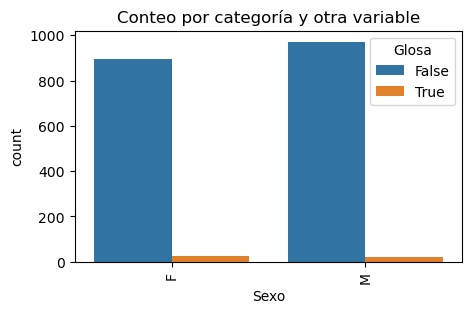

Glosa,False,True
Sexo,,
F,896,25
M,972,23


In [133]:
#Análisis para una variable categórica

# 1. Frecuencias absolutas y relativas
freq = df['Sexo'].value_counts()
print(freq)
print(freq / len(df))

# 3. Visualización de la distribución
plt.figure(figsize=(5, 3))
sns.countplot(x='Sexo', data=df)
plt.title('Conteo de categorías')
plt.xticks(rotation=90)
plt.show()

# 4. Gráfico de barras apiladas (si tienes otra variable categórica)
plt.figure(figsize=(5, 3))
sns.countplot(x='Sexo', hue='Glosa', data=df)
plt.title('Conteo por categoría y otra variable')
plt.xticks(rotation=90)
plt.show()

# 2. Tabla de frecuencias cruzadas (si tienes otra variable categórica)
pd.crosstab(df['Sexo'], df['Glosa'])

# Conclusión:

Aunque hay una ligera mayoría de pacientes hombres, la tasa de glosas es similar entre hombres y mujeres, con una pequeña diferencia a favor de los hombres (2.36% vs. 2.79%). Esto sugiere que no hay una relación significativa entre el sexo y la probabilidad de tener una glosa.

Aseguradora
NUEVA EPS             1061
EMSSANAR               409
ASMET SALUD            129
SANITAS                102
COLSANITAS              71
COMFENALCO              62
SALUD TOTAL             46
COLMEDICA               26
AXA COLPATRIA            3
MEDPLUS                  3
LA PREVISORA SOAT        1
ADRES UVT                1
MAPFRE                   1
ALLIANZ                  1
Name: count, dtype: int64
Aseguradora
NUEVA EPS             0.553758
EMSSANAR              0.213466
ASMET SALUD           0.067328
SANITAS               0.053236
COLSANITAS            0.037056
COMFENALCO            0.032359
SALUD TOTAL           0.024008
COLMEDICA             0.013570
AXA COLPATRIA         0.001566
MEDPLUS               0.001566
LA PREVISORA SOAT     0.000522
ADRES UVT             0.000522
MAPFRE                0.000522
ALLIANZ               0.000522
Name: count, dtype: float64


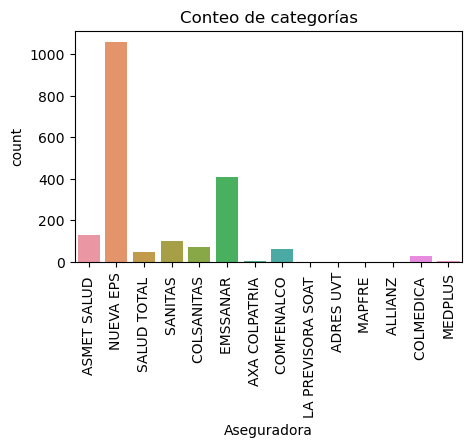

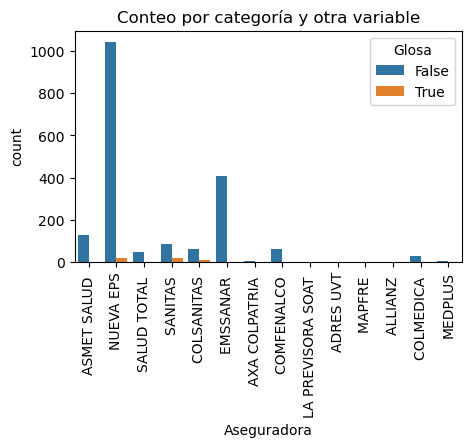

Glosa,False,True
Aseguradora,,
ADRES UVT,1,0
ALLIANZ,1,0
ASMET SALUD,128,1
AXA COLPATRIA,3,0
COLMEDICA,26,0
COLSANITAS,61,10
COMFENALCO,62,0
EMSSANAR,409,0
LA PREVISORA SOAT,1,0


In [134]:
#Análisis para una variable categórica

# 1. Frecuencias absolutas y relativas
freq = df['Aseguradora'].value_counts()
print(freq)
print(freq / len(df))

# 3. Visualización de la distribución
plt.figure(figsize=(5, 3))
sns.countplot(x='Aseguradora', data=df)
plt.title('Conteo de categorías')
plt.xticks(rotation=90)
plt.show()

# 4. Gráfico de barras apiladas (si tienes otra variable categórica)
plt.figure(figsize=(5, 3))
sns.countplot(x='Aseguradora', hue='Glosa', data=df)
plt.title('Conteo por categoría y otra variable')
plt.xticks(rotation=90)
plt.show()

# 2. Tabla de frecuencias cruzadas (si tienes otra variable categórica)
pd.crosstab(df['Aseguradora'], df['Glosa'])

# Conclusión

NUEVA EPS es la aseguradora con mayor número de pacientes, representando el 55.38% del total, con 1,061 pacientes, pero SANITAS presenta un porcentaje de glosas notablemente más alto.
EMSSANAR sigue con un 21.35%, lo que equivale a 409 pacientes.
ASMET SALUD y SANITAS tienen una representación menor, con 6.73% y 5.32%, respectivamente.
Las demás aseguradoras tienen una participación muy pequeña, con menos del 4% del total cada una.

# Análisis Bivariado/Multivariado

/Users/andreavalencia/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


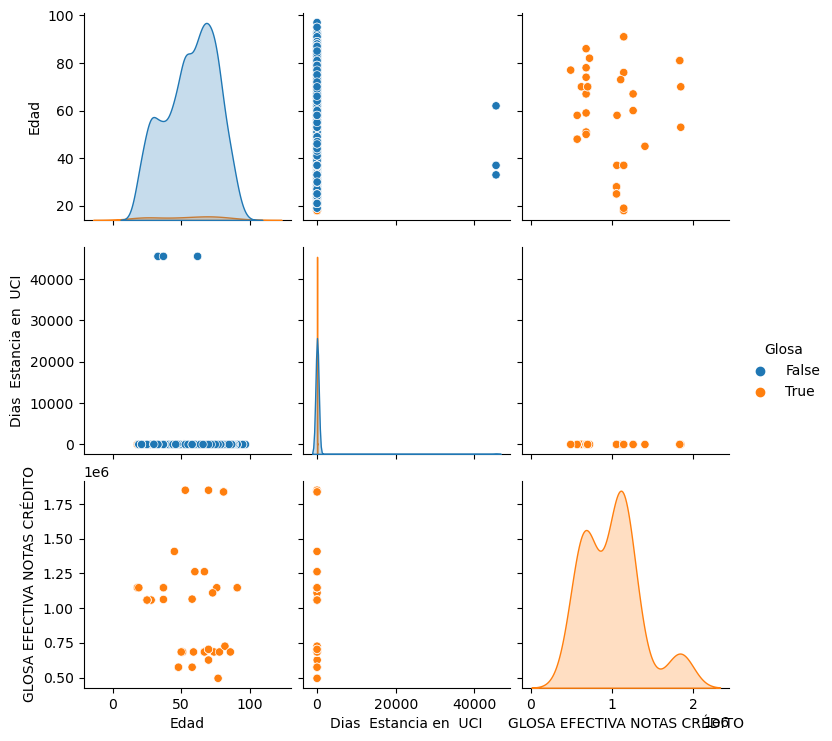

In [135]:
variables_especificas = ['Edad', 'Dias  Estancia en  UCI', 'GLOSA EFECTIVA NOTAS CRÉDITO', 'Glosa']

# Crear el gráfico pairplot solo con esas variables
sns.pairplot(df[variables_especificas], hue='Glosa')
plt.show()

# Conclusiones

Distribución de la edad:

La mayor parte de los pacientes se encuentran entre los 40 y 80 años.
Hay pocos casos donde la edad está por debajo de los 20 o por encima de los 80 años.
Se observa que tanto los pacientes con glosa como sin glosa están distribuidos de manera similar en términos de edad.
Días de estancia en UCI:

La mayoría de los pacientes tienen una estancia en UCI que se agrupa en torno a días bajos, con muy pocos casos de estancias extremadamente largas.
Los casos de glosas parecen concentrarse en estancias más largas, aunque hay excepciones.

Glosa efectiva - Notas crédito:

Hay una fuerte concentración en torno a valores cercanos a 1 millón, lo que podría indicar que la mayoría de las glosas efectivas están cerca de ese valor.
No hay una clara tendencia entre el valor de la glosa efectiva y la edad de los pacientes, aunque se observan algunos outliers en el rango más bajo.

Relación entre variables:

No parece haber una relación visual clara entre Edad y Días de estancia en UCI.
La glosa se ve más común en ciertos valores específicos, pero en su mayoría no muestra patrones claros en las variables representadas.

Aunque las distribuciones de las variables están más o menos concentradas, parece que los casos de glosas no tienen una clara correlación con la edad o la estancia en UCI, aunque hay una concentración de glosas en ciertos valores de estancia más largos. Además, las glosas efectivas muestran una acumulación en torno a valores elevados.

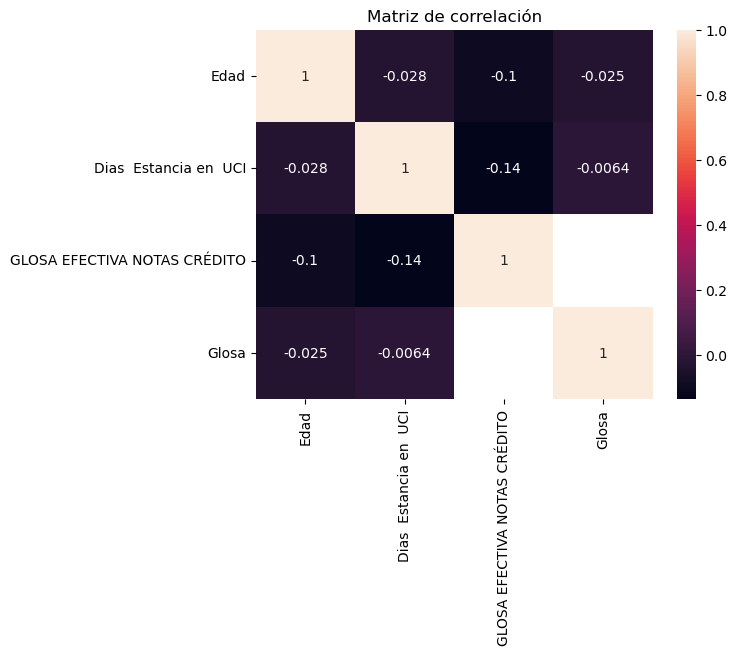

In [136]:
# Matriz de correlación
corr_matrix = df[['Edad', 'Dias  Estancia en  UCI', 'GLOSA EFECTIVA NOTAS CRÉDITO', 'Glosa']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Matriz de correlación')
plt.show()

# Conclusión

No parece haber una relación lineal significativa entre la mayoría de las variables y las glosas

# Limpieza de los datos 

In [137]:
#convertir fecha de ingreso a uci a tipo fecha
df['Fecha Ingreso Uci'] = pd.to_datetime(df['Fecha Ingreso Uci'])

In [138]:
# añadir una columna que calcule los dias desde la admision
df['Dias_admision'] = (df['Fecha Ingreso Uci'] - df['Fecha de admisión']).dt.days

In [139]:
# añadir una columna que calcule los dias desde la admision hasta la fecha de revision
df['Dias_seguimiento'] = (df['Fecha de seguimiento'] - df['Fecha de admisión']).dt.days

In [140]:
# longitud del diagnostico
df['Longitud_diagnostico'] = df['Diagnostico'].str.len()

In [141]:
# transformar la variable categorica a numerica (crear columna dummie del sexo (1 si es hombre, 0 si es mujer))
df = pd.get_dummies(df, columns=['Sexo'], prefix=['Sexo_es'])

In [142]:
# transformar la variable categorica a numerica (crear columna dummie del criterio general
df = pd.get_dummies(df, columns=['Criterio general'], prefix=['Criterio_general_es'])

In [144]:
# transformar la variable categorica a numerica (crear columna dummie del criterio especifico
df = pd.get_dummies(df, columns=['Cumple Categ.tratamiento para:'], prefix=['Categ_tto_es'])

In [147]:
# crear instancia para inicializar el encoder
le = LabelEncoder()
# reemplazar los valores de la columna 'aseguradora' por valores numericos
df['Aseguradora'] = le.fit_transform(df['Aseguradora'])

In [148]:
# análisis de los valores nulos (o faltantes) en cada columna
df.isnull().sum().sort_values(ascending=False)

CAMBIO FACTURACIÓN                     1916
CAMBIO CATEGORIA DESDE COORDINACIÓN    1916
FECHA GLOSADA                          1908
GLOSA EFECTIVA PREGLOSA                1889
CAMBIO EFECTIVO                        1885
                                       ... 
AUDITORIA DE ACUERDO CON CRITERIO         0
Fecha de admisión                         0
MES REVISIÓN                              0
Glosa                                     0
Categ_tto_es_UCIADU                       0
Length: 64, dtype: int64

In [149]:
# Reemplazar los valores nulos por 0
df.fillna(0, inplace=True)  

In [150]:
# Visualizamos los cambios realizados en el dataset
df.head()

,Sigla UnOrg.enfermería,Fecha de admisión,Nº documento,Episodio,Apellido 1,Apellido 2,Primer Nombre,Segundo Nombre,Edad,Cama,...,Criterio_general_es_RENAL,Criterio_general_es_RESPIRATORIO,Criterio_general_es_UCI-CHOQUE,Categ_tto_es_PISO AISLAMIENTO,Categ_tto_es_PISO GENERAL,Categ_tto_es_SALIDA,Categ_tto_es_UCI ADULTO,Categ_tto_es_UCI AISLAMIENTO,Categ_tto_es_UCI INTERMEDIO,Categ_tto_es_UCIADU
0,T4P7 UCI,2024-03-14,48570565,11781030,FAJARDO,VICTORIA,ADELINDA,,68,CH-740T4,...,False,False,False,False,False,False,True,False,False,False
1,T4P7 UCI,2024-03-02,31957509,11736934,LOZANO,RESTREPO,SOLANGEN,,60,CH-743T4,...,False,False,False,False,False,False,False,False,True,False
2,T4P7 UCI,2024-02-19,14947836,11689275,SANDOVAL,REINEL,LUIS,ANGEL,77,CH-744T4,...,False,False,False,False,False,False,False,True,False,False
3,T3P2 UCI AdA,2024-03-09,31219066,11764746,CHALA,,DIONISIA,,74,CU-203T3,...,False,False,False,False,False,False,True,False,False,False
4,T3P2 UCI AdA,2024-03-03,31866944,11735955,CRUZ,BRICEÑO,MILENA,,62,CU-204T3,...,False,False,False,False,False,False,True,False,False,False


# Tratamiento para conjunto de datos desbalanceado

Vamos a separar los datos numéricos transformados del conjunto de datos original para luego concatenarlos con las variables que creamos en el paso anterior.

In [159]:
# Visualizamos el tipo de datos que tiene el dataset
pd.set_option('display.max_rows', None)
print(df.dtypes)

Sigla UnOrg.enfermería                                object
Fecha de admisión                             datetime64[ns]
Nº documento                                           int64
Episodio                                               int64
Apellido 1                                            object
Apellido 2                                            object
Primer Nombre                                         object
Segundo Nombre                                        object
Edad                                                   int64
Cama                                                  object
Habit.                                                object
Aseguradora                                            int64
Categ.tratamiento                                     object
Fecha Ingreso Uci                                     object
Fecha de seguimiento                          datetime64[ns]
Dias  Estancia en  UCI                                 int64
Criterio especifico     

In [170]:
# Eliminar columnas específicas del DataFrame
df.drop(columns=['Sigla UnOrg.enfermería', 'Nº documento',
       'Apellido 1',
       'Apellido 2',
       'Primer Nombre',
       'Segundo Nombre',
       'Cama',
       'Habit.',
       'Categ.tratamiento',
       'Observaciones Auditoria Medica FCVL',
       'Observaciones Coordinador Md-adm UCI',
       'Fecha de respuesta Coordinador Md adm UCIL',
       'Seguimiento ( a cargo auditoria FVL)',
       'Impacto valorizado ',
       'MÉDICO TRATANTE ',
       'AUDITORIA DE ACUERDO CON CRITERIO ',
       'CAMBIO EFECTIVO ',
       'RX TORAX ', 'COMENTADA  HC ',
       'INTERVENCION AUDITORIA ',
       'NÚMERO DE RX SIN COMENTAR ',
       'COMENTARIO AUDITORIA ',
       'CAMBIO CATEGORIA DESDE COORDINACIÓN',
       'CAMBIO FACTURACIÓN '], axis=1, inplace=True)

**Normalizacion**

Como el conjunto de datos contiene valores numéricos, primero debemos normalizar los datos. El propósito de la normalización es hacer que todos los atributos numéricos estén en una escala común. Un método efectivo que podemos usar aquí para la función de normalización se llama MinMaxScaler(), que convierte todos los datos numéricos a un rango escalado que podemos determinar. La función MinMaxScaler está disponible dentro del método de preprocessing de sklearn:

In [ ]:
# Obtener un objeto MinMaxScaler para poder normalizar los datos
minmaxScaler = preprocessing.MinMaxScaler()

# Normalizar cada columna numérica (con el rango -1,1)
df['edadScaled'] = minmaxScaler.fit_transform(df['Edad'].values.reshape(-1,1))
df['diasEstanciaUCIScaled'] = minmaxScaler.fit_transform(df['Dias  Estancia en  UCI'].values.reshape(-1,1))
df['diasAdmisionScaled'] = minmaxScaler.fit_transform(df['Dias_admision'].values.reshape(-1,1))
df['diasSeguimientoScaled'] = minmaxScaler.fit_transform(df['Dias_seguimiento'].values.reshape(-1,1))
df['glosaEfectivaScaled'] = minmaxScaler.fit_transform(df['GLOSA EFECTIVA NOTAS CRÉDITO'].values.reshape(-1,1))
df['glosaPreglosaScaled'] = minmaxScaler.fit_transform(df['GLOSA EFECTIVA PREGLOSA'].values.reshape(-1,1))

Dado que hemos guardado los atributos numéricos transformados como variables separadas, podemos eliminar los atributos originales:

In [172]:
# Imprimir los primeros registros del conjunto de datos
df.head()

,Fecha de admisión,Episodio,Aseguradora,Fecha Ingreso Uci,Fecha de seguimiento,Criterio especifico,Diagnostico,Cumple criterio Aislamiento UCI,Medico Auditor responsable,GLOSA PROBABLE EVITADA,...,Categ_tto_es_UCI ADULTO,Categ_tto_es_UCI AISLAMIENTO,Categ_tto_es_UCI INTERMEDIO,Categ_tto_es_UCIADU,edadScaled,diasEstanciaUCIScaled,diasAdmisionScaled,diasSeguimientoScaled,glosaEfectivaScaled,glosaPreglosaScaled
0,2024-03-14,11781030,2,2024-03-14 00:00:00,2024-03-14,UCI-IAM,Infarto agudo de miocardio sin elevación del s...,NO APLICA,Dr. Eliana Carabali,0,...,True,False,False,False,0.632911,0.000000,0.992576,0.000000,0.0,0.0
1,2024-03-02,11736934,11,2024-03-02 00:00:00,2024-03-14,UCI-INESTABILIDAD CARDIOVASCULAR,Rechazo agudo clínico con disfunción ventricul...,NO APLICA,Enf. Luz Viviana Goyes,0,...,False,False,True,False,0.531646,0.000264,0.992576,0.079470,0.0,0.0
2,2024-02-19,11689275,11,2024-02-21 00:00:00,2024-03-14,UCI-CHOQUE,Choque séptico de origen a establecer\n– Síndr...,SI,Enf. Luz Viviana Goyes,0,...,False,True,False,False,0.746835,0.000484,0.992677,0.158940,0.0,0.0
3,2024-03-09,11764746,11,2024-03-09 00:00:00,2024-03-14,UCI-CHOQUE,Choque cardiogénico,NO APLICA,Enf. Luz Viviana Goyes,0,...,True,False,False,False,0.708861,0.000110,0.992576,0.033113,0.0,0.0
4,2024-03-03,11735955,12,2024-03-03 00:00:00,2024-03-14,UCI-INESTABILIDAD CARDIOVASCULAR,Disección aórtica Stanford A desde la unión si...,NO APLICA,Enf. Luz Viviana Goyes,0,...,True,False,False,False,0.556962,0.000242,0.992576,0.072848,0.0,0.0


**Transformar variables nominales a numéricas**

Crearemos las variables ficticias para todos los atributos nominales:

In [176]:
# Convertir todas las variables categóricas a variables dummy (excepto la clase)
GlosaUciCat = pd.get_dummies(df[['Cumple criterio Aislamiento UCI', 
                       'Medico Auditor responsable']])

# Visualizar el dataframe que contiene las variables dummy
GlosaUciCat.head()

,Cumple criterio Aislamiento UCI_0,Cumple criterio Aislamiento UCI_INTERMEDIO DESDE EL SERVICO,Cumple criterio Aislamiento UCI_NO,Cumple criterio Aislamiento UCI_NO APLICA,Cumple criterio Aislamiento UCI_SI,Cumple criterio Aislamiento UCI_SI,Cumple criterio Aislamiento UCI_UCI ADULTO,Medico Auditor responsable_0,Medico Auditor responsable_Dr. Eliana Carabali,Medico Auditor responsable_Enf. Luz Viviana Goyes
0,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,False,False,False,False,True
2,False,False,False,False,True,False,False,False,False,True
3,False,False,False,True,False,False,False,False,False,True
4,False,False,False,True,False,False,False,False,False,True


Una vez que se transforman los valores categóricos, deben combinarse con los valores numéricos escalados del data frame.

# Creación de la versión de entrenamiento/prueba del dataset

Vamos a separar los datos numéricos transformados del conjunto de datos original para luego concatenarlos con las variables categóricas ficticias que creamos en el paso anterior.

In [178]:
# Separamos los datos numéricos en otro dataframe (denominado GlosaUciNum)
GlosaUciNum = df[['edadScaled', 'diasEstanciaUCIScaled', 'diasAdmisionScaled', 'diasSeguimientoScaled', 
                  'glosaEfectivaScaled', 'glosaPreglosaScaled']]

# Vemos el tamaño del dataframe que contiene los datos numéricos
GlosaUciNum.shape

(1916, 6)

En este paso, concatenamos las variables categóricas transformadas y las variables numéricas usando la función pd.concat() para formar la variable X (contiene las variables independientes). La etiqueta de la variable de destino se almacena como la variable Y (variable dependiente o clase)

In [180]:
# Fusión de los dataframe

# Preparar las variables X (el parámetro axis=1 indica que la concatenación se hace a lo ancho)
X = pd.concat([GlosaUciCat, GlosaUciNum], axis=1) 
print(X.shape)

# Preparar la variable Y
Y = df['Glosa']
print(Y.shape)
X.head()

(1916, 16)
(1916,)


,Cumple criterio Aislamiento UCI_0,Cumple criterio Aislamiento UCI_INTERMEDIO DESDE EL SERVICO,Cumple criterio Aislamiento UCI_NO,Cumple criterio Aislamiento UCI_NO APLICA,Cumple criterio Aislamiento UCI_SI,Cumple criterio Aislamiento UCI_SI,Cumple criterio Aislamiento UCI_UCI ADULTO,Medico Auditor responsable_0,Medico Auditor responsable_Dr. Eliana Carabali,Medico Auditor responsable_Enf. Luz Viviana Goyes,edadScaled,diasEstanciaUCIScaled,diasAdmisionScaled,diasSeguimientoScaled,glosaEfectivaScaled,glosaPreglosaScaled
0,False,False,False,True,False,False,False,False,True,False,0.632911,0.000000,0.992576,0.000000,0.0,0.0
1,False,False,False,True,False,False,False,False,False,True,0.531646,0.000264,0.992576,0.079470,0.0,0.0
2,False,False,False,False,True,False,False,False,False,True,0.746835,0.000484,0.992677,0.158940,0.0,0.0
3,False,False,False,True,False,False,False,False,False,True,0.708861,0.000110,0.992576,0.033113,0.0,0.0
4,False,False,False,True,False,False,False,False,False,True,0.556962,0.000242,0.992576,0.072848,0.0,0.0


Ahora, necesitaremos la función train_test_split(), por lo que las importaremos desde sklearn. Esta función nos permitirá dividir el dataset en un conjunto de datos de entrenamiento y otro de prueba.

Dividiremos los datos entre datos de entrenamiento y de prueba en una proporción de 70:30 utilizando la variable test_size=0.3 en la función de división. También establecemos un valor para el parámetro random_state para la reproducibilidad del código:

In [182]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

# Creación de un modelo de clasificación sin realizar balancedo de clases

Antes de aplicar los métodos de balanceo, veamos cómo se comporta un modelo de clasificación (en este caso de Regresión Logística) al ser entrenado con los datos desbalanceados.

Entrene el algoritmo de Regresión Logística usando la función .fit en los datos de entrenamiento.

In [195]:
# Definir la función LogisticRegression y entrenar con los datos de entrenamiento
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [196]:
# Hacemos predicciones con el conjunto de prueba
predicciones = modelo.predict(X_test)

# Obtenemos la matriz de confusión a partir de los resultados obtenidos
confusionMatrix = confusion_matrix(y_test, predicciones)
print("---MATRIZ DE CONFUSIÓN---")
print(confusionMatrix)
print("-------------------------")

# Obtenemos la precisión del modelo
accuracy = modelo.score(X_test, y_test)
print('La precisión del modelo de Regresión Logística con en el conjunto de prueba es:', accuracy)

---MATRIZ DE CONFUSIÓN---
[[565   0]
 [  5   5]]
-------------------------
La precisión del modelo de Regresión Logística con en el conjunto de prueba es: 0.991304347826087


# Método de Remuestreo (Submuestreo o Undersampling)

In [197]:
# Concatenar train_x train_y para facilitar las operaciones posteriores
trainData = pd.concat([X_train,y_train],axis=1)
trainData.head()

,Cumple criterio Aislamiento UCI_0,Cumple criterio Aislamiento UCI_INTERMEDIO DESDE EL SERVICO,Cumple criterio Aislamiento UCI_NO,Cumple criterio Aislamiento UCI_NO APLICA,Cumple criterio Aislamiento UCI_SI,Cumple criterio Aislamiento UCI_SI,Cumple criterio Aislamiento UCI_UCI ADULTO,Medico Auditor responsable_0,Medico Auditor responsable_Dr. Eliana Carabali,Medico Auditor responsable_Enf. Luz Viviana Goyes,edadScaled,diasEstanciaUCIScaled,diasAdmisionScaled,diasSeguimientoScaled,glosaEfectivaScaled,glosaPreglosaScaled,Glosa
1698,False,False,True,False,False,False,False,False,False,True,0.721519,0.000066,0.992677,0.033113,0.000000,0.0,False
188,True,False,False,False,False,False,False,False,False,True,0.000000,0.000044,0.992576,0.013245,0.620299,1.0,True
1906,True,False,False,False,False,False,False,False,False,True,0.531646,0.000418,0.992576,0.125828,0.000000,0.0,False
282,True,False,False,False,False,False,False,False,False,True,0.708861,0.000088,0.993680,0.172185,0.000000,0.0,False
474,False,False,True,False,False,False,False,False,False,True,0.544304,0.000110,0.993028,0.092715,0.000000,0.0,False


**Obtener las instancias de la clase minoritaria**

Para separar la clase minoritaria, tenemos que identificar los índices del conjunto de datos donde las instancias tienen la etiqueta 'yes' en su clase.


In [205]:

# Encontrar los índices de las instancias donde la etiqueta/clase (columna Glosa) es True
minIndices = trainData[trainData['Glosa'] == True].index

# Imprimir el número de instancias con la etiqueta True
print(len(minIndices))

38


In [206]:
# Obtener las instancias que representan la clase minoritara
minData = trainData.loc[minIndices]

# Imprimir el tamaño (el número de filas debe coincidir con el tamaño que arrojó código anterior)
print(minData.shape)

(38, 17)


In [212]:
# Encontrar los índices de las instancias donde la etiqueta/clase (columna Glosa) es False
majIndices = trainData[trainData['Glosa'] == False].index

# Obtener las instancias que representan la clase mayoritaria
majData = trainData.loc[majIndices]

In [213]:
# Tomar aleatoriamente instancias de la clase mayoritaria
# el número de instancias será igual al número de instancias de la clase minoritaria = len(minIndices)
majMuestra = majData.sample(n=len(minIndices), random_state = 123)

# Imprimir el tamaño de la muestra
print(majMuestra.shape)

# Imprimir los primeros registros dela muestra
majMuestra.head()

(38, 17)


,Cumple criterio Aislamiento UCI_0,Cumple criterio Aislamiento UCI_INTERMEDIO DESDE EL SERVICO,Cumple criterio Aislamiento UCI_NO,Cumple criterio Aislamiento UCI_NO APLICA,Cumple criterio Aislamiento UCI_SI,Cumple criterio Aislamiento UCI_SI,Cumple criterio Aislamiento UCI_UCI ADULTO,Medico Auditor responsable_0,Medico Auditor responsable_Dr. Eliana Carabali,Medico Auditor responsable_Enf. Luz Viviana Goyes,edadScaled,diasEstanciaUCIScaled,diasAdmisionScaled,diasSeguimientoScaled,glosaEfectivaScaled,glosaPreglosaScaled,Glosa
979,False,False,True,False,False,False,False,False,False,True,0.113924,0.000242,0.992576,0.072848,0.0,0.0,False
346,False,False,False,False,True,False,False,False,False,True,0.430380,0.001165,0.992576,0.350993,0.0,0.0,False
313,False,False,True,False,False,False,False,False,True,False,0.455696,0.000066,0.992877,0.059603,0.0,0.0,False
1708,False,False,True,False,False,False,False,False,False,True,0.518987,0.000198,0.993228,0.145695,0.0,0.0,False
1210,False,False,False,False,True,False,False,False,True,False,0.240506,0.000264,0.994583,0.344371,0.0,0.0,False


**Preparar el nuevo dataset**

Ahora podemos concatenar estos conjuntos de datos individuales (conjunto de la clase minoritaria y muestreo de la clase mayoritaria) usando la función pd.concat(). En este caso, estamos concatenando verticalmente los datos, por lo tanto, se usa el parámetro axis = 0.

In [214]:
# Concatenar ambos datasets
balancedData = pd.concat([minData,majMuestra],axis = 0)
print('Tamaño del conjunto de datos balanceado',balancedData.shape)

Tamaño del conjunto de datos balanceado (76, 17)


Ahora, barajo el nuevo conjunto de datos para que tanto las clases minoritarias como las mayoritarias se distribuyan uniformemente. Para esto, utilizo función shuffle():

In [215]:
# Importar la función shuffle
from sklearn.utils import shuffle

# Barajar el dataset
balancedData = shuffle(balancedData)
# Imprimir los primeros registros del dataset
balancedData.head()

,Cumple criterio Aislamiento UCI_0,Cumple criterio Aislamiento UCI_INTERMEDIO DESDE EL SERVICO,Cumple criterio Aislamiento UCI_NO,Cumple criterio Aislamiento UCI_NO APLICA,Cumple criterio Aislamiento UCI_SI,Cumple criterio Aislamiento UCI_SI,Cumple criterio Aislamiento UCI_UCI ADULTO,Medico Auditor responsable_0,Medico Auditor responsable_Dr. Eliana Carabali,Medico Auditor responsable_Enf. Luz Viviana Goyes,edadScaled,diasEstanciaUCIScaled,diasAdmisionScaled,diasSeguimientoScaled,glosaEfectivaScaled,glosaPreglosaScaled,Glosa
984,False,False,False,True,False,False,False,False,True,False,0.620253,0.000066,0.992677,0.033113,0.682841,0.000000,True
183,False,False,True,False,False,False,False,False,False,True,0.240506,0.000220,0.992576,0.066225,0.620299,0.244363,True
898,False,False,False,False,True,False,False,False,True,False,0.683544,0.000022,0.992978,0.059603,0.000000,0.000000,False
207,False,False,True,False,False,False,False,False,False,True,0.734177,0.000374,0.992576,0.112583,0.000000,0.000000,False
710,False,False,True,False,False,False,False,False,False,True,0.708861,0.000088,0.992576,0.026490,0.000000,0.000000,False


Ahora, separo el conjunto de datos barajado en variables independientes, X_train_sub, y variables dependientes, y_train_sub. La separación de las variables independientes la podemos realizar utilizando la función .iloc() de pandas. (Utilizamos el sufijo _sub en los nombres de las variables para indicar que representan el conjunto de datos de entrenamiento obtenido por medio de un proceso de submuestreo).

In [217]:
# Crear los nuevos X_train y y_train

# Crear las nuevas variables independientes
X_train_sub = balancedData.iloc[:,0:19]
print('Tamaño del nuevo conjunto de entrenamiento (variables independientes)', X_train_sub.shape)

# Crear la nueva variable dependiente y_train
y_train_sub = balancedData['Glosa']
print('Tamaño del nuevo conjunto de entrenamiento (varible dependiente)',y_train_sub.shape)

Tamaño del nuevo conjunto de entrenamiento (variables independientes) (76, 17)
Tamaño del nuevo conjunto de entrenamiento (varible dependiente) (76,)


Nuestro nuevo dataset de entrenamiento está listo para ajustar un nuevo modelo de Regresión Logística (para este caso particular) y comparar los resultados con el comportamiento del modelo construido sin balancear los datos. Pero antes de realizar esta evaluación, realicemos otros procedimientos de balanceo de datos.

# Método de sobremuestreo (SMOTE)

Generaremos muestras sintéticas de la clase minoritaria utilizando el algoritmo **SMOTE** y luego equilibraremos el conjunto de datos.


**Importar las librerías necesarias:**

Las librerías necesarias para sobremuestrear el conjunto de entrenamiento son smote_variants y numpy.

_NOTA:_ debemos instalar la librería smote_variants antes de importarla.

In [ ]:
!pip install smote-variants		

import smote_variants as sv
import numpy as np

**Realizo el sobremuestreo de la clase minoritaria**

Creo una instancia de la librería SMOTE en una variable llamada oversampler usando la función sv.SMOTE(). Esta es una forma común de instanciar cualquiera de las variantes de SMOTE smote_variants.

In [219]:
# Instanciando la clase SMOTE 
oversampler= sv.SMOTE()

In [220]:
# Crear un nuevo conjunto de datos de entrenamiento
X_train_smote, y_train_smote = oversampler.sample(np.array(X_train), np.array(y_train))

2024-09-08 11:52:02,107:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [240]:
# Tamaño después de hacer sobremuestreo
print('Después de hacer sobremuestreo, el tamaño de train_X:', X_train_smote.shape)
print('Después de hacer sobremuestreo, el tamaño de train_y:', y_train_smote.shape)
if isinstance(y_train_smote, np.ndarray):
    print("Después de hacer sobremuestreo, conteo de la etiqueta 'False':", np.sum(y_train_smote == True))
    print("Después de hacer sobremuestreo, conteo de la etiqueta 'True':", np.sum(y_train_smote == False))

Después de hacer sobremuestreo, el tamaño de train_X: (2606, 16)
Después de hacer sobremuestreo, el tamaño de train_y: (2606,)
Después de hacer sobremuestreo, conteo de la etiqueta 'False': 1303
Después de hacer sobremuestreo, conteo de la etiqueta 'True': 1303


In [239]:
# Instanciando la clase MSMOTE 
oversampler= sv.MSMOTE()

# Crear un nuevo conjunto de datos de entrenamiento
X_train_msmote, y_train_msmote = oversampler.sample(np.array(X_train), np.array(y_train))

# Tamaño después de hacer sobremuestreo
print('Después de hacer sobremuestreo, el tamaño de train_X:', X_train_msmote.shape)
print("Después de hacer sobremuestreo, conteo de la etiqueta 'True':", sum(y_train_msmote==  True))
print("Después de hacer sobremuestreo, conteo de la etiqueta 'False':", sum(y_train_msmote== False))
# Creación y entrenamiento del modelo con base en el resultado de submuestreo
modelo1 = LogisticRegression()
modelo1.fit(X_train_sub, y_train_sub)

# Creación y entrenamiento del modelo con base en el resultado de sobremuestreo con SMOTE
modelo2 = LogisticRegression()
modelo2.fit(X_train_smote, y_train_smote)

# Creación y entrenamiento del modelo con base en el resultado de sobremuestreo con MSMOTE
modelo3 = LogisticRegression()
modelo3.fit(X_train_msmote, y_train_msmote)

2024-09-08 12:12:46,268:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


Después de hacer sobremuestreo, el tamaño de train_X: (2606, 16)
Después de hacer sobremuestreo, conteo de la etiqueta 'True': 1303
Después de hacer sobremuestreo, conteo de la etiqueta 'False': 1303


LogisticRegression()

In [ ]:
# Asegúrate de que X_test tenga las mismas columnas que X_train
X_test_aligned = X_test.reindex(columns=X_train.columns, fill_value=0)

# Verifica si hay alguna columna que falta o se ha añadido
missing_cols = set(X_train.columns) - set(X_test_aligned.columns)
extra_cols = set(X_test_aligned.columns) - set(X_train.columns)
print("Columnas faltantes:", missing_cols)
print("Columnas extra:", extra_cols)

# Predicción utilizando SMOTE
pred_smote = modelo2.predict(X_test_aligned)

# Predicción utilizando MSMOTE
pred_msmote = modelo3.predict(X_test_aligned)

In [246]:
# Escriba su código a continuación y presione Shift + Enter para ejecutar

from sklearn.metrics import classification_report

# Obtenemos la matriz de confusión a partir de los resultados obtenidos
confusionMatrix2 = confusion_matrix(y_test, pred_smote)
confusionMatrix3 = confusion_matrix(y_test, pred_msmote)

print("---RESULTADOS MODELO 1---")
print(confusionMatrix2)
reporte2 = classification_report(y_test, pred_smote)
print(reporte2)

print("---RESULTADOS MODELO 2---")
print(confusionMatrix3)
reporte3 = classification_report(y_test, pred_msmote)
print(reporte3)

---RESULTADOS MODELO 1---
[[565   0]
 [  0  10]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       565
        True       1.00      1.00      1.00        10

    accuracy                           1.00       575
   macro avg       1.00      1.00      1.00       575
weighted avg       1.00      1.00      1.00       575

---RESULTADOS MODELO 2---
[[565   0]
 [  0  10]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       565
        True       1.00      1.00      1.00        10

    accuracy                           1.00       575
   macro avg       1.00      1.00      1.00       575
weighted avg       1.00      1.00      1.00       575

